
Our dataset consists of clinical data from patients who entered the hospital complaining of chest pain ("angina") during exercise.  The information collected includes:

* `age` : Age of the patient

* `sex` : Sex of the patient

* `cp` : Chest Pain type

    + Value 0: asymptomatic
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
   
    
* `trtbps` : resting blood pressure (in mm Hg)

* `chol` : cholesterol in mg/dl fetched via BMI sensor

* `restecg` : resting electrocardiographic results

    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* `thalach` : maximum heart rate achieved during exercise

* `output` : the doctor's diagnosis of whether the patient is at risk for a heart attack
    + 0 = not at risk of heart attack
    + 1 = at risk of heart attack

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [3]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")

In [4]:
X = ha.drop(columns="cp")
y = ha["cp"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


## Q1: Natural Multiclass Models

Fit a multiclass KNN, Decision Tree, and LDA for the heart disease data; this time predicting the type of chest pain (categories 0 - 3) that a patient experiences.  For the decision tree, plot the fitted tree, and interpret the first couple splits.


In [5]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

ldy_y_pred = lda.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, ldy_y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, ldy_y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        34
           1       0.00      0.00      0.00        15
           2       0.34      0.62      0.44        16
           3       0.00      0.00      0.00         4

    accuracy                           0.51        69
   macro avg       0.27      0.34      0.29        69
weighted avg       0.44      0.51      0.47        69


Confusion Matrix:
[[25  1  8  0]
 [ 5  0  9  1]
 [ 3  2 10  1]
 [ 1  1  2  0]]


In [8]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn_y_pred = knn.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, knn_y_pred))

print("\nConfusion Matrix:")

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.76      0.63        34
           1       0.33      0.20      0.25        15
           2       0.50      0.31      0.38        16
           3       0.00      0.00      0.00         4

    accuracy                           0.49        69
   macro avg       0.34      0.32      0.32        69
weighted avg       0.45      0.49      0.45        69


Confusion Matrix:


In [7]:
param_grid = {'n_neighbors': np.arange(1, 31)}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Params: " + str(grid_search.best_params_))
print("Best Score: " + str(grid_search.best_score_))

Best Params: {'n_neighbors': 16}
Best Score: 0.49085365853658536


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast


In [9]:
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test)

y_prob = best_knn.predict_proba(X_test)

print("\nConfusion Matrix (Best K):")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report (Best K):")
print(classification_report(y_test, y_pred_best))


Confusion Matrix (Best K):
[[28  2  4  0]
 [ 8  0  7  0]
 [12  1  3  0]
 [ 3  0  1  0]]

Classification Report (Best K):
              precision    recall  f1-score   support

           0       0.55      0.82      0.66        34
           1       0.00      0.00      0.00        15
           2       0.20      0.19      0.19        16
           3       0.00      0.00      0.00         4

    accuracy                           0.45        69
   macro avg       0.19      0.25      0.21        69
weighted avg       0.32      0.45      0.37        69



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [13]:
dtree = DecisionTreeClassifier(max_depth=2, random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [14]:
y_pred = dtree.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        34
           1       0.00      0.00      0.00        15
           2       0.37      0.81      0.51        16
           3       0.00      0.00      0.00         4

    accuracy                           0.55        69
   macro avg       0.28      0.39      0.31        69
weighted avg       0.45      0.55      0.48        69


Confusion Matrix:
[[25  0  9  0]
 [ 5  0 10  0]
 [ 3  0 13  0]
 [ 1  0  3  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


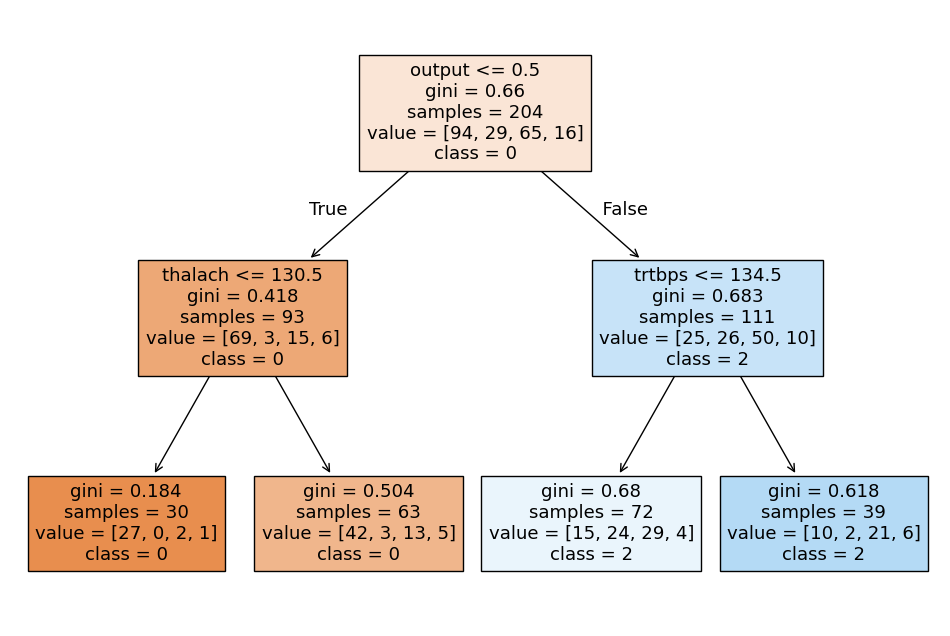

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(dtree, feature_names=X.columns, class_names=['0', '1', '2', '3'], filled=True)
plt.show()

The first split was based on whether or not th output was greater than or equal to 0.5. There were 93 where this was true and 111 where this was false. The second splits were based on whether "thalach" was greater or less than 130.5, and whether "trtbps" was greater or less than 134.5.

## Q2:  OvR

Create a new column in the `ha` dataset called `cp_is_3`, which is equal to `1` if the `cp` variable is equal to `3` and `0` otherwise.

Then, fit a Logistic Regression to predict this new target, and report the **F1 Score**.

Repeat for the other three `cp` categories.  Which category was the OvR approach best at distinguishing?

In [ ]:
ha["cp_is_3"] = (ha["cp"] == 3).astype(int)

X = ha.drop(columns='cp_is_3')
y = ha['cp_is_3']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

lgr = LogisticRegression()

lgr.fit(x_train, y_train)

y_pred = lgr.predict(x_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        65
           1       1.00      0.75      0.86         4

    accuracy                           0.99        69
   macro avg       0.99      0.88      0.92        69
weighted avg       0.99      0.99      0.98        69


Confusion Matrix:
[[65  0]
 [ 1  3]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
ha["cp_is_2"] = (ha["cp"] == 2).astype(int)

X = ha.drop(columns='cp_is_2')
y = ha['cp_is_2']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

lgr2 = LogisticRegression()

lgr2.fit(x_train, y_train)

y_pred_2 = lgr2.predict(x_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_2))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_2))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        16

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69


Confusion Matrix:
[[53  0]
 [ 0 16]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
ha["cp_is_1"] = (ha["cp"] == 1).astype(int)

X = ha.drop(columns='cp_is_1')
y = ha['cp_is_1']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

lgr1 = LogisticRegression()

lgr1.fit(x_train, y_train)

y_pred_1 = lgr1.predict(x_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_1))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_1))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88        54
           1       0.67      0.13      0.22        15

    accuracy                           0.80        69
   macro avg       0.73      0.56      0.55        69
weighted avg       0.77      0.80      0.74        69


Confusion Matrix:
[[53  1]
 [13  2]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
ha["cp_is_0"] = (ha["cp"] == 0).astype(int)

X = ha.drop(columns='cp_is_0')
y = ha['cp_is_0']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

lgr0 = LogisticRegression()

lgr0.fit(x_train, y_train)

y_pred_0 = lgr0.predict(x_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_0))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_0))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        34

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69


Confusion Matrix:
[[35  0]
 [ 0 34]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Q3: OvO

Reduce your dataset to only the `0` and `1` types of chest pain.

Then, fit a Logistic Regression to predict between the two groups, and report the **ROC-AUC**.  

Repeat comparing category `0` to `2` and `3`.  Which pair was the OvO approach best at distinguishing?

In [16]:
# 0 and 1
ha_01 = ha[ha['cp'].isin([0, 1])]

X = ha_01[['age', 'sex', 'trtbps', 'chol', 'restecg', 'thalach', 'output']]
y = (ha_01['cp'] == 1).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC for cp types 0 vs 1: {roc_auc}")

ROC-AUC for cp types 0 vs 1: 0.7572463768115942


In [17]:
# 0 and 2
ha_02 = ha[ha['cp'].isin([0, 2])]

X = ha_02[['age', 'sex', 'trtbps', 'chol', 'restecg', 'thalach', 'output']]
y = (ha_02['cp'] == 0).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC for cp types 0 vs 2: {roc_auc}")

ROC-AUC for cp types 0 vs 2: 0.8112244897959183


In [18]:
#0 and 3
ha_03 = ha[ha['cp'].isin([0, 3])]

X = ha_03[['age', 'sex', 'trtbps', 'chol', 'restecg', 'thalach', 'output']]
y = (ha_03['cp'] == 0).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC for cp types 0 vs 3: {roc_auc}")

ROC-AUC for cp types 0 vs 3: 0.8571428571428572


In [19]:
#1 and 2
ha_12 = ha[ha['cp'].isin([1, 2])]

X = ha_12[['age', 'sex', 'trtbps', 'chol', 'restecg', 'thalach', 'output']]
y = (ha_12['cp'] == 2).astype(int)  # Target: 1 if cp is 2, 0 otherwise
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC for cp types 1 vs 2: {roc_auc}")

ROC-AUC for cp types 1 vs 2: 0.6298701298701298


In [20]:
1 and 3
ha_13 = ha[ha['cp'].isin([1, 3])]

X = ha_13[['age', 'sex', 'trtbps', 'chol', 'restecg', 'thalach', 'output']]
y = (ha_13['cp'] == 3).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC for cp types 1 vs 3: {roc_auc}")

ROC-AUC for cp types 1 vs 3: 0.5750000000000001


In [21]:
#2 and 3
ha_23 = ha[ha['cp'].isin([2, 3])]

X = ha_23[['age', 'sex', 'trtbps', 'chol', 'restecg', 'thalach', 'output']]
y = (ha_23['cp'] == 3).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC for cp types 2 vs 3: {roc_auc}")

ROC-AUC for cp types 2 vs 3: 0.6


The best 0v0 at distinguishing was the pair 0 and 3. Its ROC score was .8571, the best among all pairs.